In [2]:
# 간단한 Simple Linear Regression 구현
# Tensorflow

import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Training Data Set
x_data = np.array([1, 2, 3, 4, 5]).reshape(5,1)
t_data = np.array([3, 5, 7, 9, 11]).reshape(5,1)

# 데이터 전처리 생략

# Model 생성
model = Sequential()

# Model 안에 Layer 넣기
model.add(Flatten(input_shape=(1,)))
model.add(Dense(1, activation='linear'))

# model 설정
# learning_rate 값에 따라 W와 b의 update 값이 달라짐
# learning_rate: hyperparameter - 데이터마다 다르다
# 적절한 hyperparamter 값은 사용자가 찾아야 함
model.compile(optimizer=SGD(learning_rate=1e-2), 
              loss='mse')

# 모델 학습
model.fit(x_data,
          t_data,
          epochs=5000,
          verbose=0)


In [3]:
# 예측
result = model.predict([[10]])
result

1/1 [==============================] - 0s 95ms/step


array([[21.000032]], dtype=float32)

In [5]:
# 예측된 값이 정확한지 확인이 어려움
# sklearn을 이용해서 정답과 가장 가까운 값을 알아보고 우리 결과와 비교

# sklearn을 이용해서 똑같이 구현
import numpy as np
from sklearn import linear_model

# Training Data Set
x_data = np.array([1, 2, 3, 4, 5]).reshape(5,1)
t_data = np.array([3, 5, 7, 9, 11]).reshape(5,1)

# model 생성
sklearn_model = linear_model.LinearRegression()

# 학습
sklearn_model.fit(x_data, t_data)

predict_value = sklearn_model.predict([[10]])
predict_value

array([[21.]])

In [8]:
# 오존 예제
# 독립변수 3개, 종속변수 1개
# 온도만 독립변수로 사용
# 온도에 따른 오존량 예측

import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# raw data loading
df = pd.read_csv('./data/ozone/ozone.csv')

training_data_set = df[['Temp', 'Ozone']]

# 제일 처음 해야하는 작업
# 전처리: 결측치 제거
#     - 1. 삭제
#     - 2. 보정
# 예제에서는 결치값을 삭제할 것
training_data_set = training_data_set.dropna(how='any') # how='any' 행 날림
training_data_set # 116 rows

,Temp,Ozone
0,67,41.0
1,72,36.0
2,74,12.0
3,62,18.0
5,66,28.0
...,...,...
147,63,14.0
148,70,30.0
150,75,14.0
151,76,18.0


In [15]:
# Training Data Set
x_data = training_data_set['Temp'].values.reshape(-1, 1)
t_data = training_data_set['Ozone'].values.reshape(-1, 1)

keras_model = Sequential()

keras_model.add(Flatten(input_shape=(1,)))
output_layer = Dense(1, activation='linear')
keras_model.add(output_layer)

keras_model.compile(optimizer=SGD(learning_rate=1e-4),
                    loss='mse')

keras_model.fit(x_data,
                t_data,
                epochs=2000,
                verbose=0)

In [16]:
# 예측
keras_predict = keras_model.predict([[62]])
keras_predict

# 이 값이 정확한지 파악이 어려움

1/1 [==============================] - 0s 192ms/step


array([[39.78075]], dtype=float32)

[[0.6961718]] [-3.3819]


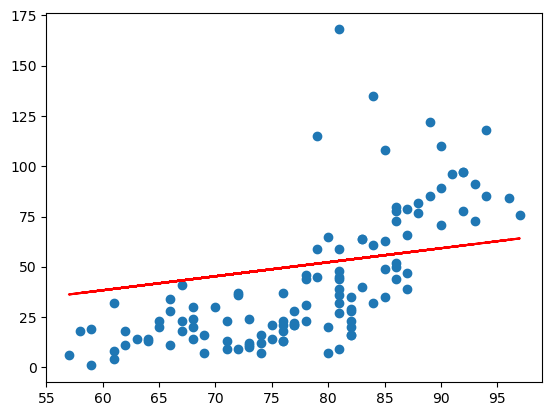

In [19]:
# 그래프로 확인
# scatter를 이용해 데이터를 화면에 찍기
# 모델도 그려보기
# W와 b 값을 알아야 한다

weights, bias = output_layer.get_weights()
print(weights, bias)
plt.scatter(x_data, t_data)
plt.plot(x_data, x_data * weights + bias, color='r')
plt.show()

In [21]:
# 같은 데이터를 sklearn으로 학습시키고 예측하고 그래프 그리기
# sklearn 구현

import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

# x_data와 t_data는 위에서 이미 만들었다

# model 생성
sklearn_model = linear_model.LinearRegression()

# model 학습
sklearn_model.fit(x_data, t_data)

# model 예측
sklearn_result = sklearn_model.predict([[62]])
sklearn_result # array([[3.58411393]])

array([[3.58411393]])

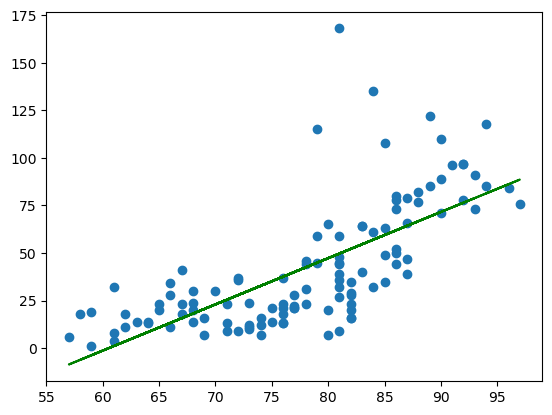

In [22]:
# 그래프로 확인
# 모델의 W, b 값을 알아야 한다

weights = sklearn_model.coef_  # 가중치(W)
bias = sklearn_model.intercept_ # bias(b)

plt.scatter(x_data, t_data)
plt.plot(x_data, x_data * weights + bias, color='g')
plt.show()

In [ ]:
# 정규화(normalization)가 되지 않아서 생긴 문제
# 정규화 방법
# 1. Min Max Scaling (0~1 사이의 값)
# 2. Z-score Normalization
# 3. Student's T분포를 이용한 Normalization



In [29]:
# Tensorflow로 구현된 내용을 가져와서 데이터 정규화 후 모델을 다시 학습

from sklearn.preprocessing import MinMaxScaler
# MinMaxScaler를 이용하면 정규화를 쉽게 할 수 있음
scaler_x = MinMaxScaler() # 독립변수를 위한 scaler
scaler_t = MinMaxScaler() # 종속변수를 위한 scaler

# scaler가 Min과 Max 값을 알아야 함

# Training Data Set
x_data = training_data_set['Temp'].values.reshape(-1, 1)
t_data = training_data_set['Ozone'].values.reshape(-1, 1)

scaler_x.fit(x_data)
scaler_t.fit(t_data)

x_data_norm = scaler_x.transform(x_data)
t_data_norm = scaler_t.transform(t_data)

keras_model = Sequential()

keras_model.add(Flatten(input_shape=(1,)))
output_layer = Dense(1, activation='linear')
keras_model.add(output_layer)

keras_model.compile(optimizer=SGD(learning_rate=1e-2),
                    loss='mse')

keras_model.fit(x_data_norm,
                t_data_norm,
                epochs=2000,
                verbose=0)

In [30]:
# 정규화된 예측

predict_data = 62
scaled_predict_data = scaler_x.transform([[predict_data]]) # array([[0.125]])

keras_predict = keras_model.predict(scaled_predict_data) # [[0.34573612]]

scaled_keras_predict = scaler_t.inverse_transform(keras_predict)
scaled_keras_predict

1/1 [==============================] - 0s 36ms/step


array([[3.7446277]], dtype=float32)

In [33]:
# 독립변수 3개 (온도, 태양광세기, 바람)
# 1. Tensorflow로 Multiple Linear Regression 구현
#     학습이 끝난 후 solar, wind, temp 순으로 [150, 10, 80] 일 때 Ozone은 얼마인가?
# 2. sklearn으로 구현해서 비교


# raw data loading
df = pd.read_csv('./data/ozone/ozone.csv')
training_data_set = df.iloc[:,:4]
training_data_set = training_data_set.dropna(how='any') # how='any' 행 날림
training_data_set # 111 rows

,Ozone,Solar.R,Wind,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
6,23.0,299.0,8.6,65
...,...,...,...,...
147,14.0,20.0,16.6,63
148,30.0,193.0,6.9,70
150,14.0,191.0,14.3,75
151,18.0,131.0,8.0,76


In [52]:
from sklearn.preprocessing import MinMaxScaler
# MinMaxScaler를 이용하면 정규화를 쉽게 할 수 있음
scaler_x = MinMaxScaler() # 독립변수를 위한 scaler
scaler_t = MinMaxScaler() # 종속변수를 위한 scaler

# Training Data Set
x_data = training_data_set.iloc[:, 1:].values.reshape(-1, 3)
t_data = training_data_set['Ozone'].values.reshape(-1, 1)

scaler_x.fit(x_data)
scaler_t.fit(t_data)

x_data_norm = scaler_x.transform(x_data)
t_data_norm = scaler_t.transform(t_data)

keras_model = Sequential()

keras_model.add(Flatten(input_shape=(3,)))
output_layer = Dense(1, activation='linear')
keras_model.add(output_layer)

keras_model.compile(optimizer=SGD(learning_rate=1e-2),
                    loss='mse')

keras_model.fit(x_data_norm,
                t_data_norm,
                epochs=5000,
                verbose=0)

In [53]:
# 정규화된 예측

predict_data = [150, 10, 80]
scaled_predict_data = scaler_x.transform([predict_data])

keras_predict = keras_model.predict(scaled_predict_data)

scaled_keras_predict = scaler_t.inverse_transform(keras_predict)
scaled_keras_predict

1/1 [==============================] - 0s 35ms/step


array([[43.270187]], dtype=float32)

In [49]:
# sklearn 구현

import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

# x_data와 t_data는 위에서 이미 만들었다

# model 생성
sklearn_model = linear_model.LinearRegression()

# model 학습
sklearn_model.fit(x_data, t_data)

# model 예측
sklearn_result = sklearn_model.predict([[150, 10, 80]])
sklearn_result

array([[43.46252939]])